In [278]:
import numpy as np 
import pandas as pd 
import os
import datetime
import yaml

In [279]:
ENV_FILE= "/Users/EnzoButhiot/Documents/corona/env.yaml"
with open(ENV_FILE) as f: 
    params= yaml.load(f, Loader=yaml.FullLoader)

#Initialisation des chemin vers les fichiers
ROOT_DIR= os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE=os.path.join(#ROOT_DIR,
                       params['directories']['processed'],
                       params['files']['all_data'])

#Lecture du fichier de données
epidemie_df =(pd.read_csv(DATA_FILE, parse_dates=["Last Update"])
             .assign(day=lambda _df: _df['Last Update'].dt.date)
             .drop_duplicates(subset=['Country/Region','Province/State','day'])
             [lambda df: df['day'] <= datetime.date(2020, 3, 21)]
             )


In [280]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Liaoning,Mainland China,2020-01-22 17:00:00,2.0,NaN,NaN,41.2956,122.6085,01-22-2020.csv,2020-01-22
1,Ningxia,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,37.2692,106.1655,01-22-2020.csv,2020-01-22
2,Qinghai,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,35.7452,95.9956,01-22-2020.csv,2020-01-22
3,Shaanxi,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,35.1917,108.8701,01-22-2020.csv,2020-01-22
4,Shandong,Mainland China,2020-01-22 17:00:00,2.0,NaN,NaN,36.3427,118.1498,01-22-2020.csv,2020-01-22


In [281]:
epidemie_df_sir= (epidemie_df
                .groupby(['Country/Region','day'])
                .agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
                .reset_index()
                 )

In [289]:
france_df=(epidemie_df[epidemie_df['Country/Region']=='France']
        .groupby(['Country/Region','day'])
        .agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
        .reset_index()
          )
france_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
31,France,2020-03-17,7674.0,148.0,12.0
32,France,2020-03-18,9046.0,148.0,12.0
33,France,2020-03-19,10883.0,243.0,12.0
34,France,2020-03-20,12623.0,450.0,12.0
35,France,2020-03-21,14301.0,562.0,12.0


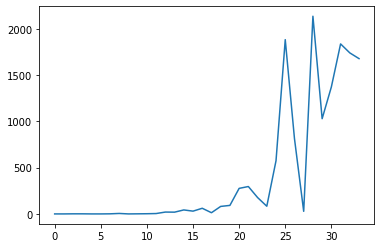

In [290]:
france_df['infected'] = france_df['Confirmed'].diff()

# Number of infected over time for France
plt.plot(france_df.loc[2:]['infected'].reset_index(drop=True).index, france_df.loc[2:]['infected'])

In [362]:
spain_df=(epidemie_df[epidemie_df['Country/Region']=='Spain']
        .groupby(['Country/Region','day'])
        .agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
        .reset_index()
          )

spain_df['infected'] = spain_df['Confirmed'].diff()

spain_df # On voit qu'on a des valeurs négatives pour infected

,Country/Region,day,Confirmed,Deaths,Recovered,infected
0,Spain,2020-02-01,1.0,0.0,0.0,NaN
1,Spain,2020-02-09,2.0,0.0,0.0,1.0
2,Spain,2020-02-15,2.0,0.0,2.0,0.0
3,Spain,2020-02-25,6.0,0.0,2.0,4.0
4,Spain,2020-02-26,13.0,0.0,2.0,7.0
5,Spain,2020-02-27,15.0,0.0,2.0,2.0
6,Spain,2020-02-28,32.0,0.0,2.0,17.0
7,Spain,2020-02-29,45.0,0.0,2.0,13.0
8,Spain,2020-03-01,84.0,0.0,2.0,39.0
9,Spain,2020-03-02,120.0,0.0,2.0,36.0


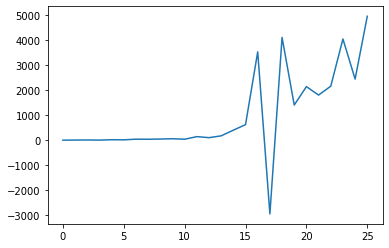

In [294]:
# Nombre d'infectés dans le temps pour l'Espagne, on voit qu'on a des valeurs négatives
plt.plot(spain_df.loc[2:]["infected"].reset_index(drop=True).index, spain_df.loc[2:]["infected"])

In [295]:
france_df['Confirmed'].diff()

# Fait la différence entre les lignes

0        NaN
1        1.0
2        0.0
3        0.0
4        1.0
5        1.0
6        0.0
7        0.0
8        1.0
9        5.0
10       0.0
11       1.0
12       2.0
13       4.0
14      20.0
15      19.0
16      43.0
17      30.0
18      61.0
19      13.0
20      81.0
21      92.0
22     276.0
23     296.0
24     177.0
25      83.0
26     575.0
27    1883.0
28     814.0
29      28.0
30    2136.0
31    1029.0
32    1372.0
33    1837.0
34    1740.0
35    1678.0
Name: Confirmed, dtype: float64

In [296]:
def get_country(self, country):
    return (epidemie_df[epidemie_df['Country/Region']==country]
        .groupby(['Country/Region','day'])
        .agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
        .reset_index()
        )

# Monkey Patch pd.DataFrame
pd.DataFrame.get_country = get_country

In [297]:
get_country(epidemie_df, 'South Korea').head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [298]:
italy_df = epidemie_df.get_country('Italy')
italy_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,Italy,2020-01-31,2.0,0.0,0.0
1,Italy,2020-02-07,3.0,0.0,0.0
2,Italy,2020-02-21,20.0,1.0,0.0
3,Italy,2020-02-22,62.0,2.0,1.0
4,Italy,2020-02-23,155.0,3.0,2.0


In [299]:
# epidemie_df.get_country('Mainland China').head()

In [300]:
epidemie_df.get_country('South Korea').head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [301]:
korea_df =(epidemie_df[epidemie_df['Country/Region']=='South Korea']
        .groupby(['Country/Region','day'])
        .agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
        .reset_index()
          )
korea_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
38,South Korea,2020-03-05,6088.0,35.0,41.0
39,South Korea,2020-03-06,6593.0,42.0,135.0
40,South Korea,2020-03-07,7041.0,44.0,135.0
41,South Korea,2020-03-08,7314.0,50.0,118.0
42,South Korea,2020-03-09,7478.0,53.0,118.0


In [302]:
korea_df['infected']= korea_df['Confirmed'].diff()
italy_df['infected']= italy_df['Confirmed'].diff()

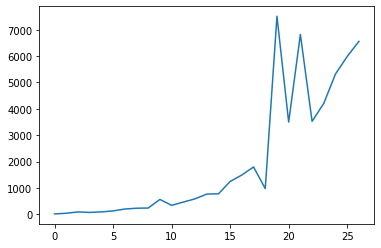

In [303]:
# Number of infected over time for Italy

plt.plot(italy_df.loc[2:]['infected'].reset_index(drop=True).index, italy_df.loc[2:]['infected'])

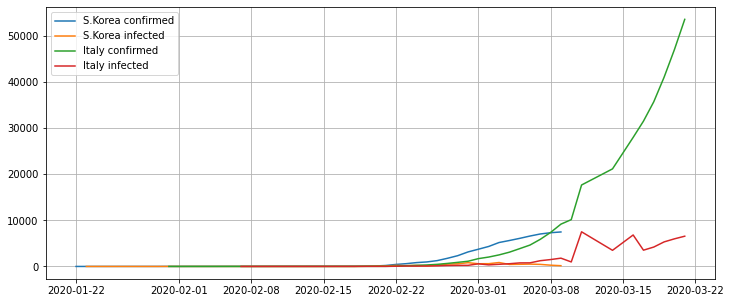

In [304]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig=plt.figure(figsize=(12,5))
plt.plot(korea_df['day'], korea_df['Confirmed'], label="S.Korea confirmed")
plt.plot(korea_df['day'], korea_df['infected'], label='S.Korea infected')
plt.plot(italy_df['day'], italy_df['Confirmed'], label="Italy confirmed")
plt.plot(italy_df['day'], italy_df['infected'], label="Italy infected")
plt.grid(True)
plt.legend()
plt.show()

In [305]:
beta, gamma = [0.01, 0.1]

def SIR(t, y):
    S=y[0]
    I=y[1]
    R=y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])


In [306]:
korea_df.loc[2:].head() 

,Country/Region,day,Confirmed,Deaths,Recovered,infected
2,South Korea,2020-01-24,2.0,0.0,0.0,1.0
3,South Korea,2020-01-25,2.0,0.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0,1.0
5,South Korea,2020-01-27,4.0,0.0,0.0,1.0
6,South Korea,2020-01-28,4.0,0.0,0.0,0.0


In [365]:
from scipy.integrate import solve_ivp

beta, gamma = [0.01, 0.1]
solution_korea = solve_ivp(SIR, [0, 40], [51_470_000*0.0001, 1, 0], t_eval=np.arange(0, 40, 1))

# On multiplie la population par 0.0001 car le solveur met beaucoup trop de temps sinon

solution_italy = solve_ivp(SIR, [0, 40], [66_000_000*0.0001, 1, 0], t_eval=np.arange(0, 40, 1))

In [366]:
#solution_korea
solution_italy

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1364
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 t_events: None
        y: array([[ 6.60000000e+03,  2.50986072e-07,  6.05069433e-07,
         6.10721657e-07,  1.14336543e-07,  1.87901721e-06,
         7.79514212e-08, -3.10120337e-07,  4.43486669e-07,
        -4.23163706e-07, -3.49680564e-07,  8.04338943e-08,
         1.22258093e-07, -2.72891941e-07,  3.01648586e-07,
        -5.41101081e-07,  1.69219999e-07,  1.15086480e-07,
         5.20221952e-07, -9.60960396e-07, -4.74943597e-09,
         6.20729957e-07,  4.11156652e-07, -6.47841866e-07,
         7.18258379e-07,  6.17172026e-07, -2.58233066e-07,
         1.15618574e-06,  3.60838220e-07, -1.97104617e-07,
        -2.23215614e-

In [367]:
# Create dataframe with solution_korea output 

df_solution_korea = (pd.DataFrame(data=[solution_korea.t, solution_korea.y[0], solution_korea.y[1], solution_korea.y[2] ])
                      .T
                      .rename(columns={0: "Time", 1: "Susceptible", 2 : "Infected", 3: "Recovered"}))
df_solution_korea.head()

,Time,Susceptible,Infected,Recovered
0,0.0,5.147000e+03,0.500000,0.500000
1,1.0,-6.562058e-07,4742.175021,405.824980
2,2.0,1.541960e-06,4290.897399,857.102599
3,3.0,-2.994914e-07,3882.564526,1265.435475
4,4.0,-2.841732e-07,3513.089661,1634.910340


In [368]:
# Merge df_solution_korea with korea_df

korea_df2 = pd.concat([df_solution_korea, korea_df.loc[2:]['infected'].reindex(df_solution_korea.index)], axis=1)

korea_df2.head()

,Time,Susceptible,Infected,Recovered,infected
0,0.0,5.147000e+03,0.500000,0.500000,NaN
1,1.0,-6.562058e-07,4742.175021,405.824980,NaN
2,2.0,1.541960e-06,4290.897399,857.102599,1.0
3,3.0,-2.994914e-07,3882.564526,1265.435475,0.0
4,4.0,-2.841732e-07,3513.089661,1634.910340,1.0


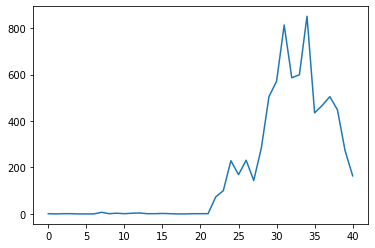

In [369]:
# Infected population for Korea
plt.plot(korea_df.loc[2:]['infected'].reset_index(drop=True).index, korea_df.loc[2:]['infected'])

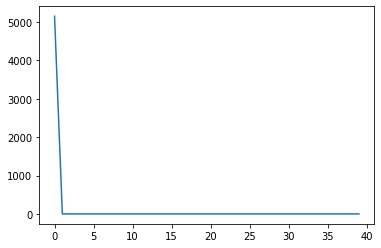

In [370]:
# Susceptible population for Korea
plt.plot(df_solution_korea["Time"], df_solution_korea["Susceptible"])

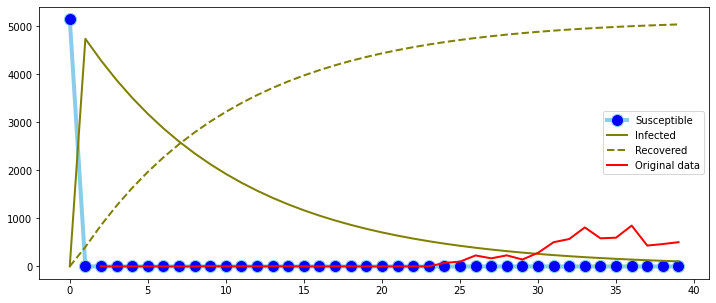

In [371]:
# PLot showing all populations for beta, gamma = [0.001, 0.1] : we can see original data. It displays more information than the 
# one above

fig = plt.figure(figsize=(12, 5))

plt.plot( 'Time', 'Susceptible', data=df_solution_korea, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Time', 'Infected', data=df_solution_korea, marker='', color='olive', linewidth=2)
plt.plot( 'Time', 'Recovered', data=df_solution_korea, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.plot("Time", 'infected', data= korea_df2, marker='', color='red', linewidth=2, label='Original data')
plt.legend()

In [372]:
def plot_epidemia(solution, infected, susceptible=False):
    fig = plt.figure(figsize=(12, 5))
    if susceptible:
        plt.plot(solution.t, solution.y[0])
    plt.plot(solution.t, solution.y[1])
    plt.plot(solution.t, solution.y[2])
    plt.plot(infected.reset_index(drop=True).index, infected, "k*:")
    plt.grid("True")
    if susceptible:
        plt.legend(["Susceptible", "Infected", "Recovered", "Original Data"])
    else:
        plt.legend(["Infected", "Recovered", "Original Data"])
    plt.show()

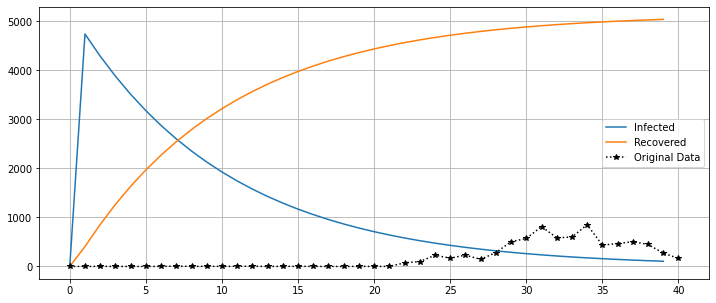

In [373]:
plot_epidemia(solution_korea, korea_df.loc[2:]['infected'])

# Les courbes infected et recovered sont bien trop hautes comparées à la donnée originelle. 
# Les paramètres beta et gamma ne sont pas bons.

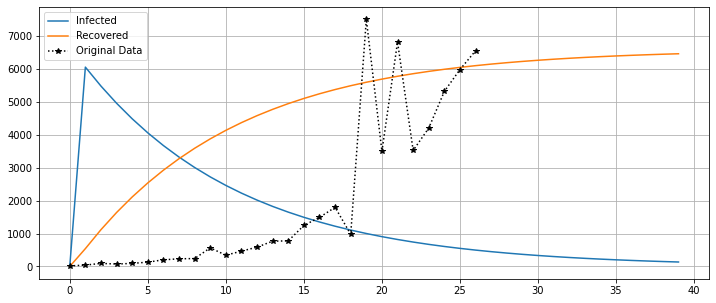

In [374]:
plot_epidemia(solution_italy, italy_df.loc[2:]['infected'])

# Le constat est le même pour l'Italie

#### Approximation

In [341]:
korea_df['infected'].max()

851.0

In [342]:
korea_df['infected'].diff().max()

252.0

In [343]:
(korea_df['Recovered'].diff().loc[korea_df['infected'] != 0] / korea_df.loc[korea_df['infected'] != 0]['infected']).mean()

0.17870945831971552

In [344]:
beta, gamma = [0.001, 0.1]
solution_korea = solve_ivp(SIR, [0, 40], [51_470_000*0.00001, 1, 0], t_eval=np.arange(0, 41, 1))

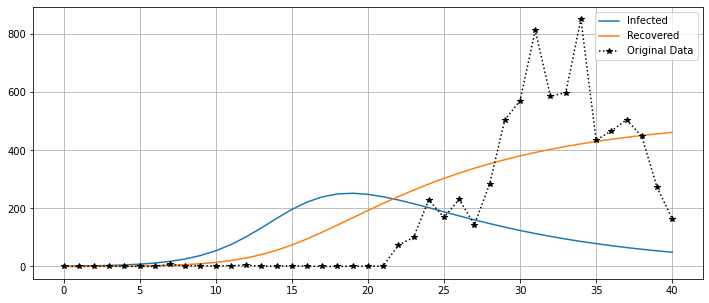

In [345]:
plot_epidemia(solution_korea, korea_df.loc[2:]['infected'])

# On voit que les courbes se sont adaptées, elles sont bien moins hautes qu'avant et plus en accord avec la donnée originelle.

In [266]:
total_population = 51_470_000
infected_population = korea_df.loc[2:]['infected']
nb_steps = len(infected_population)

In [346]:
def sumsq_error(parameters):
    beta, gamma = parameters
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    solution = solve_ivp(SIR, [0, nb_steps-1], [total_population*0.0001, 1, 0], t_eval=np.arange(0, nb_steps, 1))
    # On muliplie toujours par 0.0001 car sinon le solveur met trop de temps
    return(sum((solution.y[1]-infected_population)**2))

In [347]:
%%time
from scipy.optimize import minimize

msol = minimize(sumsq_error, [0.1, 0.1], method='Nelder-Mead')
msol.x

CPU times: user 11.4 s, sys: 115 ms, total: 11.5 s
Wall time: 11.7 s


array([ 2.54053535, 13.32818259])

In [348]:
beta_optimal = 2.54
gamma_optimal = 13.32

In [350]:
beta = beta_optimal
gamma = gamma_optimal

def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

solution_korea_optimal = solve_ivp(SIR, [0, 40], [51_470_000*0.0001, 1, 0], t_eval=np.arange(0, 40, 1))

In [353]:
solution_korea_optimal

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 3176
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 t_events: None
        y: array([[ 5.14700000e+03,  3.73634844e-08,  3.73023946e-08,
         3.73023940e-08,  3.73023959e-08,  3.73023967e-08,
         3.73023910e-08,  3.73023925e-08,  3.73023947e-08,
         3.73023919e-08,  3.73023884e-08,  3.73023938e-08,
         3.73023944e-08,  3.73023936e-08,  3.73023934e-08,
         3.73023935e-08,  3.73023937e-08,  3.73023940e-08,
         3.73023945e-08,  3.73023896e-08,  3.73023963e-08,
         3.73023984e-08,  3.73023989e-08,  3.73023994e-08,
         3.73023999e-08,  3.73024004e-08,  3.73024000e-08,
         3.73024011e-08,  3.73024024e-08,  3.73024024e-08,
         3.73024027e-

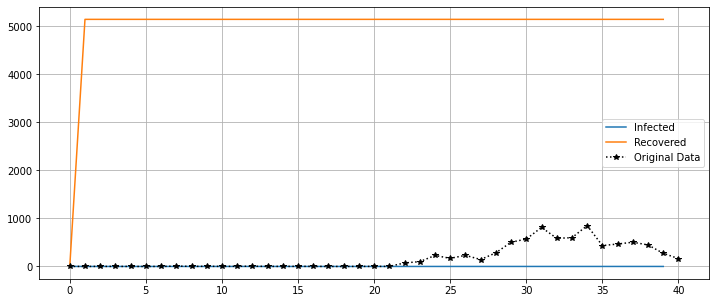

In [375]:
plot_epidemia(solution_korea_optimal, korea_df.loc[2:]['infected'])


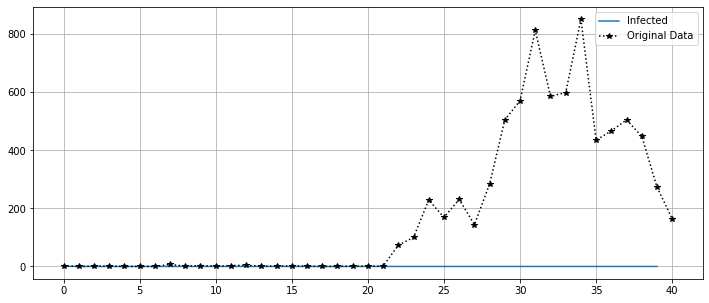

In [355]:
fig = plt.figure(figsize=(12, 5))
plt.plot(solution_korea_optimal.t, solution_korea_optimal.y[1])
plt.plot(korea_df.loc[2:]['infected'].reset_index(drop=True).index, korea_df.loc[2:]['infected'], "k*:")
plt.grid("True")
plt.legend(["Infected", "Original Data"])
plt.show()

In [356]:
china_df = epidemie_df.get_country('Mainland China')[:49]
china_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
44,Mainland China,2020-03-06,79771.0,3029.0,53172.0
45,Mainland China,2020-03-07,78619.0,3051.0,53511.0
46,Mainland China,2020-03-08,79455.0,3084.0,56114.0
47,Mainland China,2020-03-09,76902.0,3071.0,55004.0
48,Mainland China,2020-03-10,77201.0,3088.0,56620.0


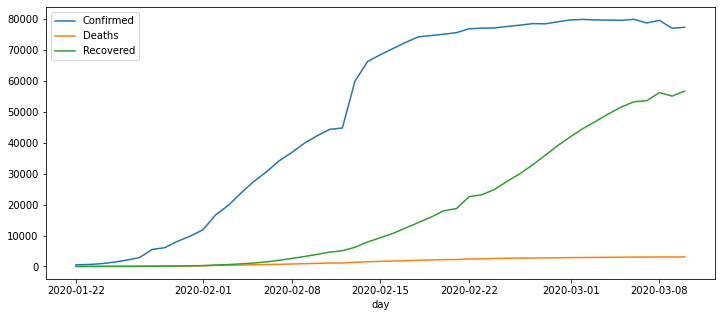

In [357]:
china_df.set_index('day').plot.line(figsize=(12, 5));

In [358]:
beta, gamma = [0.001, 0.1]
china_df['infected'] = china_df['Confirmed'].diff()
nb_steps = china_df.shape[0]
solution_china = solve_ivp(SIR, [0, nb_steps-1], [1_350_000_000*0.0001, 1, 0], t_eval=np.arange(0, nb_steps, 1))

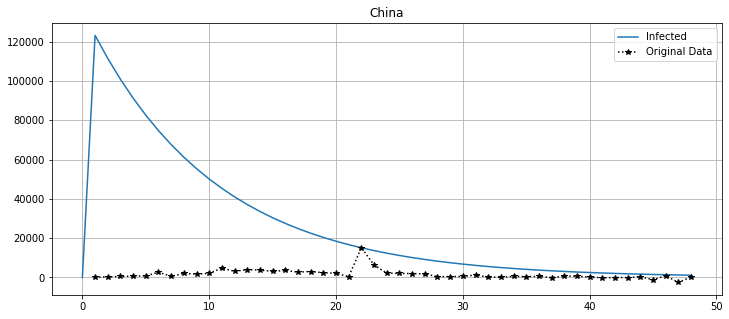

In [359]:
fig = plt.figure(figsize=(12, 5))
plt.plot(solution_china.t, solution_china.y[1])
plt.plot(china_df['infected'].reset_index(drop=True).index, china_df['infected'], "k*:")
plt.title('China')
plt.grid("True")
plt.legend(["Infected", "Original Data"])
plt.show()

In [360]:
korea_df.to_clipboard()